# **Model1 : RandomForest/ Lgbm/ GradientBoosting Ensemble**


In [1]:
# Colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 1. Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## 2. Loading the data


In [3]:
train = pd.read_csv('./drive/MyDrive/data2/train.csv')
test = pd.read_csv('./drive/MyDrive/data2/test_x.csv')

## 3. EDA

### 데이터 훑어보기


In [4]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [5]:
test.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1


### Null값 & 자료형 확인


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

### QA & QE


In [8]:
eda_train = train.copy()

In [9]:
#Q_A는 답변
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

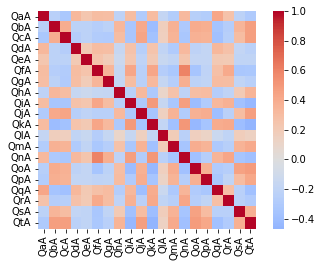

In [10]:
#train의 마키아벨리니즘 테스트 데이터의 spearman 방식 상관분석
#spearman 상관 계수는 선형적인 상관 관계를 나타내지 않고 단순히 한 변수가 증가할 때 다른 변수가 증가하는지 감소하는지에 대한 관계만을 나타낸다. (-1~1)
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [11]:
#마키아벨리니즘 테스트 데이터의 각 column에 해당하는 고유값 출력
for col in eda_train[Answers]:
    print(col)
    print(sorted(eda_train[col].unique()))
    print("----------------------")

QaA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QbA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QcA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QdA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QeA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QfA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QgA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QhA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QiA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QjA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QkA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QlA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QmA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QnA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QoA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QpA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QqA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QrA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------------
QsA
[1.0, 2.0, 3.0, 4.0, 5.0]
----------------

In [12]:
#해당 column의 값을 뒤집는다
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns:
    eda_train[flip] = 6 - eda_train[flip]

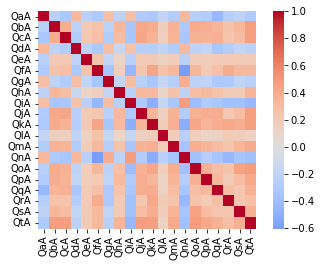

In [13]:
#뒤집고 상관관계 분석
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

jhl 님께서 올려주신 게시물을 보고, correalation을 통한 마키아벨리니즘 테스트 EDA를 진행해보았습니다. 

이런게 정말 창의적인 EDA구나.. 하며 감상했습니다.

좋은 정보 공유 감사합니다. 앞으로도 열심히 배우겠습니다.

In [14]:
#Q_E는 질문을 답할 때까지의 시간
#마키아벨리니즘 Q X E, X에 해당하는 리스트
questions = [i for i in list(ascii_lowercase)[:20]]
#QaE~QtE의 열 값을 모두 더한 delay column을 생성
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1)
print(eda_train['delay'])

0        17874
1        49565
2        29661
3        72714
4        18487
         ...  
45527    13080
45528    26033
45529    25427
45530    23673
45531    27352
Name: delay, Length: 45532, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


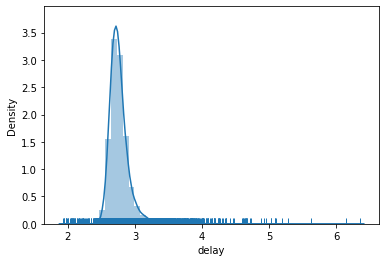

In [15]:
#dealy column에 10승 루트 취함 -> 분포를 고르게
eda_train['delay'] = eda_train['delay'] ** (1/10)
sns.distplot(eda_train['delay'], rug = True)

delay column 분포를 고르게 해주기 위해 10승 루트를 해줌.

### other features

In [16]:
#투표한사람, 안 한사람의 데이터 셋
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

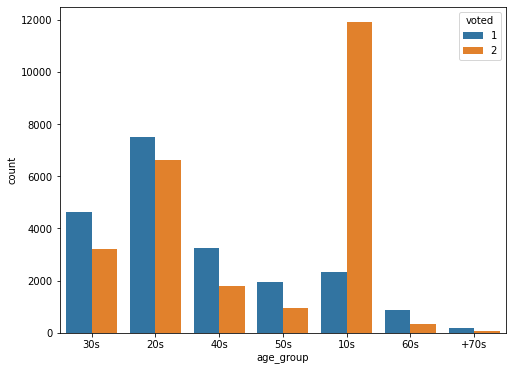

In [17]:
#나이에 따른 투표자 수 비교 -> 10대의 투표율이 저조하고 나머지 세대는 모두 투표한 사람이 많다.
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])

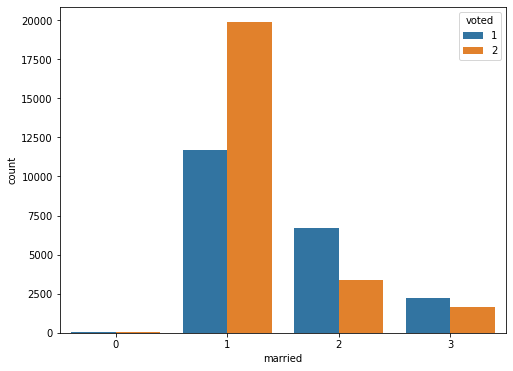

In [18]:
#결혼상태에 따른 투표자수 비교 -> 결혼 안한 사람의 투표율이 저조 (나이와 상관있지 않을까?)
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])

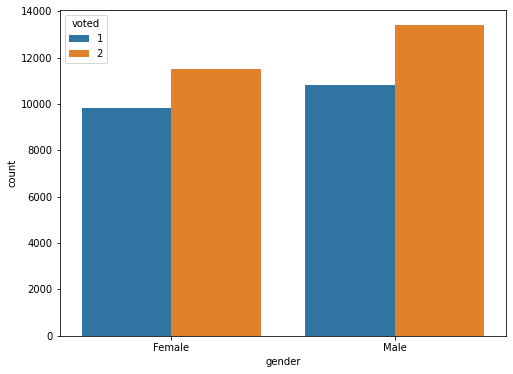

In [19]:
#성별에 따른 투표자 수 비교 -> 유의미하지는 않은 것같지만 남성의 수가 많다
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'gender', hue = eda_train['voted'])

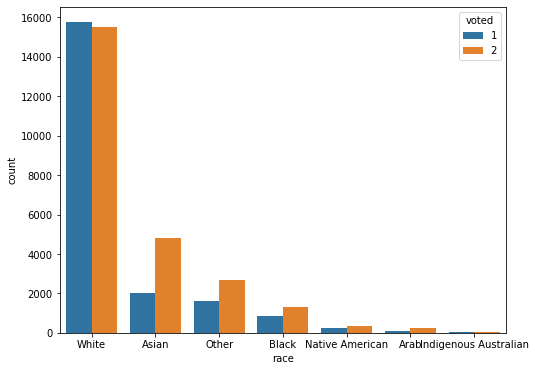

In [20]:
#인종에 따른 투표수 비교 -> 백인 제외 하고 다른 인종은 투표안한 사람의 비율이 높다
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'race', hue = eda_train['voted'])

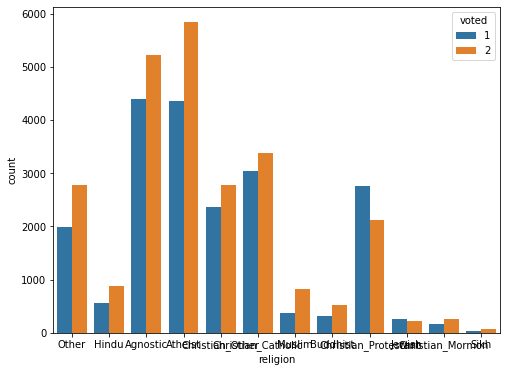

In [21]:
#종교에 따른 투표수 비교 -> 크게 유의미하진 않은 것 같다
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'religion', hue = eda_train['voted'])

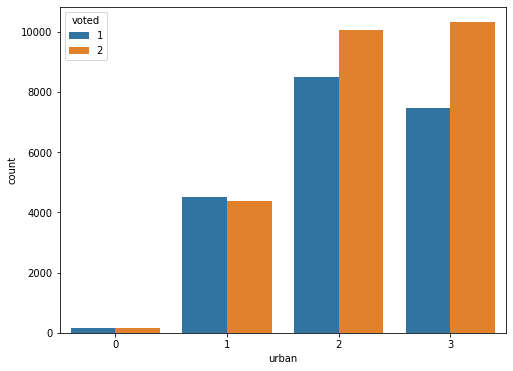

In [22]:
#유년기 거주구역에 따른 투표수 비교 -> 도시화가 될 수록 투표자 비율이 줄어 든다
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'urban', hue = eda_train['voted'])

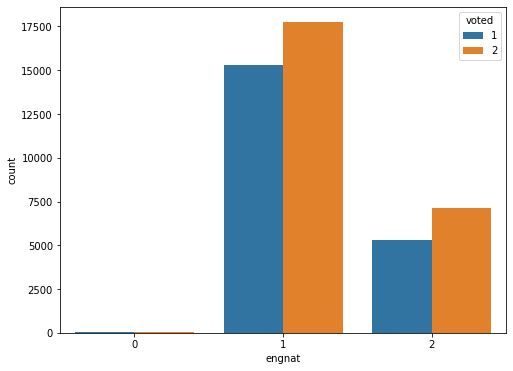

In [23]:
#모국어가 영어인지에 따른 투표수 비교 -> 모국어가 영어인 사람이 많다
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted'])

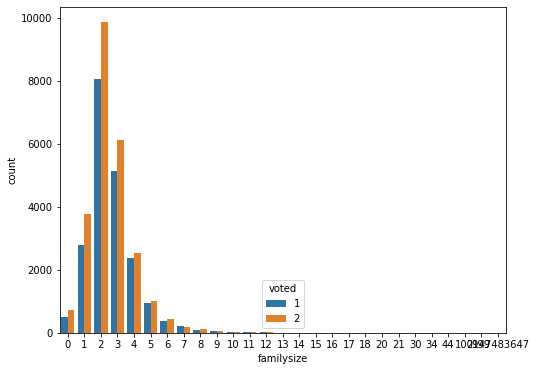

In [24]:
#형제자매수에 따른 투표수 비교 -> 큰 의미 없다
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'familysize', hue = eda_train['voted'])

In [25]:
#형제자매수에 따른 투표수 비교 -> 큰 의미 없다
#모국어가 영어인지에 따른 투표수 비교 -> 단순 모국어가 영어인 사람이 많다
#유년기 거주구역에 따른 투표수 비교 -> 도시화가 될 수록 투표자 비율이 줄어 든다
#종교에 따른 투표수 비교 -> 크게 유의미하진 않은 것 같다
#인종에 따른 투표수 비교 -> 백인 제외 하고 다른 인종은 투표안한 사람의 비율이 높다
#성별에 따른 투표자 수 비교 -> 유의미하지는 않은 것같지만 남성의 수가 많다
#결혼상태에 따른 투표자수 비교 -> 결혼 안한 사람의 투표율이 저조 (나이와 상관있지 않을까?)
#나이에 따른 투표자 수 비교 -> 10대의 투표율이 저조하고 나머지 세대는 모두 투표한 사람이 많다.

## 4. Feature Engineering

In [26]:
# train 데이터 준비, x는 데이터셋, y는 target인 투표 유무
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [27]:
#train데이터와 예측해야하는 실험데이터 준비
dataset = [x_train, test]

### 마키아밸리 테스트 FE

In [28]:
#answers에 QaA~QtA
questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]
print(answers)

['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA']


In [29]:
#성격검사 질문에 따른 분류(serect 항목 빼고) train데이터의 상관관계에 맞게 더하고 빼줌(양의 상관관계는 +, 음의 상관관계는 -)
for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

Tactic/ Morality/ View에 따라 feature 항목을 나눠보았습니다.

In [30]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

In [31]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

In [32]:
#모든 성격검사 대답 데이터의 평균값을 Mach_score로 column 생성
for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

In [33]:
#모든 성격검사 대답 데이터의 합의 10승 루트값을 dealy로 column 생성
for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)

In [34]:
#모든 대답의 조합을 나눈 column들을 생성
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['%s_dv_%s'%(a,b)] = data[a]/data[b]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [35]:
#원래 있던 대답 데이터는 삭제
for data in dataset:
  data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
  data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

### 나머지 Features


In [36]:
#왼손 오른손은 상관없는 피처라고 판단하고 삭제
for data in dataset:
  data.drop('hand', axis=1, inplace = True)

In [37]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]
print(wr_no_need)

['wr_02', 'wr_04', 'wr_05', 'wr_07', 'wr_08', 'wr_10', 'wr_12', 'wr_13']


EDA에서 결과에 큰 영향이 없다고 판단된 feature들을 제거해주었습니다.

In [38]:
for data in dataset:
  data.drop(wr_no_need, axis=1, inplace = True)

In [39]:
# TIPI test에 따라 항목 나누기
for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

TIPI test에 따라 feature 항목을 나눠놓았는데, 이때는 tipi feature들이 flip된 형태로 저장되어있는지 몰라서 따로 전처리를 해주지 않았었습니다.

In [40]:
#기존 tp값은 삭제
for data in dataset:
  data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
  data.drop('tp10', axis = 1, inplace = True)

In [41]:
#index column제거, 변수 index에 test의 인덱스는 저장해놓음
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

In [42]:
#범주형 column 수치화
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

## 5. Model

In [43]:
#KFold 분할, n_splits = 3 -> 훈련, 검증 3개를 만든다
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print(k_fold)

KFold(n_splits=3, random_state=0, shuffle=True)


In [44]:
#앙상블 모델들 3개 앙상블 (소프트 보팅)
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [45]:
#앙상블한 모델의 test데이터 예측 확률(voted가 1일 확률, 2일 확률 열이 생성된다 -> [:,1]로 voted가 2일 확률값 추출, 즉 투표안한 확률 추출)
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})
submission.to_csv('./drive/MyDrive/data2/model1.csv', index=False)


# **Model2: Lgbm Ensemble with different features**

## 1. Libraries

In [47]:
#pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.2 MB/s 
     |████████████████████████████████| 133 kB 20.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=61712783f51b7e5674673faa2b4d51a09dc1213fb4e5f750fb0a9eaf73d0c81d
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [48]:
import pandas as pd
import numpy as np

from string import ascii_lowercase
from itertools import combinations

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [49]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance

import matplotlib.pyplot as plt

import warnings
import gc
warnings.filterwarnings("ignore")

## 2. Loading the data

In [64]:
train = pd.read_csv('./drive/MyDrive/data2/train.csv')
test = pd.read_csv('./drive/MyDrive/data2/test_x.csv')

## 3. Feature Engineering

In [65]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

In [66]:
dataset = [x_train, test]





### 마키아밸리 테스트 FE

In [67]:
questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]

In [68]:
for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

In [69]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

In [70]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

In [71]:
for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

In [72]:
#delay의 분산을 delay_var column생성
for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)
  data['delay_var'] = data['delay'].var()

In [73]:
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['mach_%s_dv_%s'%(a,b)] = data[a]/data[b]

In [74]:
#각 질문의 값을 나눈 것의 분산을 column생성
for data in dataset:
  data['mach_var'] = data[answers].var(axis=1)


### 나머지 Features


In [75]:
#tp값을 뒤집음
tps = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']
for data in dataset:
  for tp in tps:
    data[tp] = 7 - data[tp]

tipi feature들을 일반적인 형태로 복구시켜줬습니다.

In [76]:
#tipi값이 0 일경우 nan으로 변경 nan값을 tipi의 평균으로 다시 설정(무응답 값을 평균값으로 대체)
for data in dataset:
  for tp in tps:
    data[tp] = data[tp].replace(0, np.nan)
    mean = data[tp].mean(axis=0)
    data[tp] = data[tp].replace(np.nan , mean)


tp중 무응답 값들을 평균값으로 대체했습니다.

In [77]:
for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

In [78]:
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

In [79]:
#나이가 10대인 column 생성
import numpy as np
for data in dataset:
  teenager_ox = 1*np.array(data['age_group'] == '10s')
  data['teenager_ox'] = teenager_ox

10대인지 아닌지의 여부가 투표 여부에 큰 영향을 미칠 것 같아 하나의 column을 더 만들어주었습니다. 

In [80]:
#tp 값들 끼리 나는 feature 생성
tpcoms = list(combinations(tps, 2))
for data in dataset:
  for a,b in tpcoms:
    data['tp_%s_dv_%s'%(a,b)] = data[a]/data[b]

tp 값들끼리 나눈 feature들을 생성해주었습니다.

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

In [82]:
#성별에 따른 성향 feature 추가
for data in dataset:
  data['Es_gender'] = data['Es']*data['gender']
  data['Con_gender'] = data['Con']*data['gender']
  data['Op_gender'] = data['Op']*data['gender']

EDA 결과, 성별에 따라 Emotional Stability/ Conscience/ Open Minded가 투표 여부에 미치는 영향이 크다고 판단되어 feature를 추가해주었습니다.

정보 출처: https://www.sciencedirect.com/science/article/abs/pii/S0261379413001613

## 4. Feature Selection 1 & Model 2-1

In [83]:
# lgbm 모델을 이용한 분류 (여기서는 EDA에 이용한 피처들을 삭제하지 않았음) -> 최대한 많은 피처 사용
# rain_test_split의 default로 설정된 학습 / 테스트 데이터셋의 비율은 75% / 25%
# 점수는 auc 점수
# feature의 개수로 반복(피처의 개수 별로 score 출력), 피처는 피처의 중요도로 내림차순 정렬(중요한것만 점점 남김)
def lgbm_rfe_4040(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=4040)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)        
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive


In [84]:
lgbm_archive_4040 = lgbm_rfe_4040(x_train, y_train)

327 0.7663571008735874
294 0.7660670383221295
264 0.7657200913159423
237 0.765880582857297
213 0.7659521817557927
191 0.7646257997307956
171 0.7650784669855428
153 0.7658692090739423
137 0.7648601897880456
123 0.7654815681625553
110 0.7665872024551462
99 0.7653618016023113
89 0.7657288857987004
80 0.7661970599329394
72 0.7665065915425168
64 0.7681169763163647
57 0.7664088733409893
51 0.7665750983878874
45 0.7650991635421391
40 0.7659958744863851


In [85]:
#앞선 lgbm으로 구한 7번째 아카이브의 feature들로만 lgbm 다시 구함(최적 feature)
model = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_1 = x_train[lgbm_archive_4040.iloc[15,2]]

model.fit(x_train_1, y_train)

pred_y1 = model.predict_proba(test[lgbm_archive_4040.iloc[15,2]])
pred_y1 = pred_y1[:,1]

## 5. Feature Selection 2 & Model 2-2

In [86]:
def lgbm_rfe_1234(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=1234)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive


In [87]:
lgbm_archive_1234 = lgbm_rfe_1234(x_train, y_train)

327 0.7606883932704029
294 0.7607328718524707
264 0.7608124536292094
237 0.760685449834825
213 0.7614037571319912
191 0.7621606094188693
171 0.7613181950416972
153 0.7611011127743857
137 0.7607083120751874
123 0.7622467010160927
110 0.7605655632365207
99 0.7608550477895577
89 0.7607356906981829
80 0.7613529244667709
72 0.7622457042971668
64 0.7609859605909796
57 0.7597470389661035
51 0.7620822891145211
45 0.7588466591538978
40 0.7599067787477098


In [88]:
model2 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_2 = x_train[lgbm_archive_1234.iloc[9,2]]

model2.fit(x_train_2, y_train)

pred_y2 = model2.predict_proba(test[lgbm_archive_1234.iloc[9,2]])
pred_y2 = pred_y2[:,1]

## 6. Feature Selection 3 & Model 2-3

In [89]:
def lgbm_rfe_99087(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=99087)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive


In [90]:
lgbm_archive_99087 = lgbm_rfe_99087(x_train, y_train)

327 0.7606271175444907
294 0.7606271175444907
264 0.76117223602114
237 0.7609148215568939
213 0.7609594153675159
191 0.7607899277570929
171 0.7603910271711878
153 0.7583139361930901
137 0.7608641106895271
123 0.7600271167724653
110 0.7589122715069178
99 0.7594428055505644
89 0.7603099333654845
80 0.757697280839087
72 0.7583310732909939
64 0.7579665247260461
57 0.7583685383179284
51 0.7592508420369868
45 0.7587904128879444
40 0.7588265393223086


In [91]:
model3 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_3 = x_train[lgbm_archive_99087.iloc[2,2]]

model3.fit(x_train_3, y_train)

pred_y3 = model3.predict_proba(test[lgbm_archive_99087.iloc[2,2]])
pred_y3 = pred_y3[:,1]

## 7. Feature Selection 4 & Model 2-4 

In [92]:
def lgbm_rfe_42(x_data, y_data, ratio=0.9, min_feats=40):
    feats = x_data.columns.tolist()
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4)
        x_train, x_val, y_train, y_val = train_test_split(x_data[feats], y_data, random_state=42)
        model.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=100, verbose=False)
        val_pred = model.predict_proba(x_val)
        val_pred = val_pred[:,1]
        score = roc_auc_score(y_val, val_pred)
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive


In [93]:
lgbm_archive_42 = lgbm_rfe_42(x_train, y_train)

327 0.7678107064224513
294 0.7680996338612872
264 0.7687866342621309
237 0.769633928530291
213 0.7673134810099865
191 0.7689773120514715
171 0.7696342242754337
153 0.7684993879009479
137 0.7682193172508577
123 0.7699310434399181
110 0.7690395119246309
99 0.7682715240513025
89 0.7675401151824599
80 0.7682354275783653
72 0.7678554417666607
64 0.7664651282855262
57 0.7684487376538855
51 0.7678232211116456
45 0.7696309710788646
40 0.7698066748246667


In [94]:
model4 = LGBMClassifier(objective="binary", num_iterations= 10**3)

x_train_4 = x_train[lgbm_archive_42.iloc[9,2]]

model4.fit(x_train_4, y_train)

pred_y4 = model4.predict_proba(test[lgbm_archive_42.iloc[9,2]])
pred_y4 = pred_y4[:,1]

## 8. Ensemble

In [95]:
pred_all = (pred_y1 + pred_y2 + pred_y3 + pred_y4) * (1/4)

submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_all
})
submission.to_csv('./drive/MyDrive/data2/model2.csv', index=False)


# **Model3: NN**

3번째 모델은 Junho Sun 님께서 공유해주신 코드를 그대로 활용하였습니다.

좋은 모델을 공유해주신 덕분에 public score도 0.78대로 올라갈 수 있었습니다. 
정말 감사합니다!

In [96]:
import random
from datetime import datetime

import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import StratifiedKFold
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda:0


In [97]:
drop_list = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE',
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE',
             'index', 'hand']

replace_dict = {'education': str, 'engnat': str, 'married': str, 'urban': str}
train_data = pd.read_csv('./drive/MyDrive/data2/train.csv')
test_data = pd.read_csv('./drive/MyDrive/data2/test_x.csv')

In [98]:
#familysize가 50이상인 데이터 제거
train_data = train_data.drop(train_data[train_data.familysize > 50].index)
train_y = train_data['voted']

#train_x는 drop_list와 투표여부 column 삭제
train_x = train_data.drop(drop_list + ['voted'], axis=1)

#test_x는 drop_list column 삭제
test_x = test_data.drop(drop_list, axis=1)

#replace_dict의 column 형 변환
train_x = train_x.astype(replace_dict)
test_x = test_x.astype(replace_dict)

#범주형 데이터를 숫자형 데이터로 
train_x = pd.get_dummies(train_x)
test_x = pd.get_dummies(test_x)

#ndarray형태로 변환, train_y는 voted 데이터 투표한 사람은1, 안한 사람은 2-> 1, 0
train_y = 2 - train_y.to_numpy()
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()


In [99]:
#텐서 생성
train_y_t = torch.tensor(train_y, dtype=torch.float32)
train_x_t = torch.tensor(train_x, dtype=torch.float32)
test_x_t = torch.tensor(test_x, dtype=torch.float32)

In [100]:
#다차원에서는 ,으로 행과 열 분리 [:, :20] -> 행은 전체 20미만의 열(즉 feature 0~19 까지)
train_x_t[:, :20] = (train_x_t[:, :20] - 3.) / 2.
test_x_t[:, :20] = (test_x_t[:, :20] - 3.) / 2
train_x_t[:, 20] = (train_x_t[:, 20] - 5.) / 4.
test_x_t[:, 20] = (test_x_t[:, 20] - 5.) / 4.
train_x_t[:, 21:31] = (train_x_t[:, 21:31] - 3.5) / 3.5
test_x_t[:, 21:31] = (test_x_t[:, 21:31] - 3.5) / 3.5

#test데이터의 row 개수
test_len = len(test_x_t)


In [101]:
#하이퍼파라미터
N_REPEAT = 5
N_SKFOLD = 7
N_EPOCH = 48
BATCH_SIZE = 72
LOADER_PARAM = {
    'batch_size': BATCH_SIZE,
    'num_workers': 2,
    'pin_memory': True
}

#예측해야하는 row 수
prediction = np.zeros((test_len, 1), dtype=np.float32)

In [102]:
#range(N_REPEAT)으로 반복을 통해 StratifiedKFold 시드 여러개, 여러번 반복한다
for repeat in range(N_REPEAT):

    skf, tot = StratifiedKFold(n_splits=N_SKFOLD, random_state=repeat, shuffle=True), 0.
    for skfold, (train_idx, valid_idx) in enumerate(skf.split(train_x, train_y)):
        train_idx, valid_idx = list(train_idx), list(valid_idx)
        train_loader = DataLoader(TensorDataset(train_x_t[train_idx, :], train_y_t[train_idx]),
                                  shuffle=True, drop_last=True, **LOADER_PARAM)
        valid_loader = DataLoader(TensorDataset(train_x_t[valid_idx, :], train_y_t[valid_idx]),
                                  shuffle=False, drop_last=False, **LOADER_PARAM)
        test_loader = DataLoader(TensorDataset(test_x_t, torch.zeros((test_len,), dtype=torch.float32)),
                                 shuffle=False, drop_last=False, **LOADER_PARAM)
        
        #91->180->32->1 layer 층 구성
        model = nn.Sequential(
            #Dropout으로 일부 파라미터를 학습에 반영하지 않음
            nn.Dropout(0.05),
            nn.Linear(91, 180, bias=False),
            #음수 일부 반영
            nn.LeakyReLU(0.05, inplace=True),
            #Dropout으로 일부 파라미터를 학습에 반영하지 않음
            nn.Dropout(0.5),
            nn.Linear(180, 32, bias=False),
            #음수 반영 X
            nn.ReLU(inplace=True),
            nn.Linear(32, 1)
        ).to(DEVICE)
        
        #손실함수 
        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.20665], device=DEVICE))
        
        #최적화
        optimizer = optim.AdamW(model.parameters(), lr=5e-3, weight_decay=7.8e-2)
        
        #학습률 조정
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=N_EPOCH // 6, eta_min=4e-4)
        
        #prediction_t = 0의 배열, loss_t=1.0
        prediction_t, loss_t = np.zeros((test_len, 1), dtype=np.float32), 1.

        # for epoch in range(N_EPOCH):
        for epoch in tqdm(range(N_EPOCH), desc='{:02d}/{:02d}'.format(skfold + 1, N_SKFOLD)):
            #모델 학습
            model.train()
            for idx, (xx, yy) in enumerate(train_loader):
                #backpropagation을 하기전에 gradients를 zero로 만들어주고 시작
                optimizer.zero_grad()
                xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                #원소가 1인 차원 삭제
                pred = model(xx).squeeze()
                
                #손실함수
                loss = criterion(pred, yy)
                #backpropagation
                loss.backward()
                
                #최적화
                optimizer.step()
                
                #학습률 조정
                scheduler.step(epoch + idx / len(train_loader))

            #validation시에는 gradient 계산 안함 -> no_grad()로 비활성화
            with torch.no_grad():
                model.eval()
                running_acc, running_loss, running_count = 0, 0., 0
                for xx, yy in valid_loader:
                    xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                    pred = model(xx).squeeze()
                    loss = criterion(pred, yy)
                    running_loss += loss.item() * len(yy)
                    running_count += len(yy)
                    running_acc += ((torch.sigmoid(pred) > 0.5).float() == yy).sum().item()
                # print('R{:02d} S{:02d} E{:02d} | {:6.4f}, {:5.2f}%'
                #       .format(repeat + 1, skfold + 1, epoch + 1, running_loss / running_count,
                #               running_acc / running_count * 100))

                if running_loss / running_count < loss_t:
                    loss_t = running_loss / running_count
                    for idx, (xx, _) in enumerate(test_loader):
                        xx = xx.to(DEVICE)
                        # 투표한 사람은1, 안한 사람은 0 -> 2에서 빼면 1과 2에 가까운 결과가 나옴(2에 가까울 수록 투표 안한사람)  
                        pred = (2. - torch.sigmoid(model(xx).detach().to('cpu'))).numpy()
                        prediction_t[BATCH_SIZE * idx:min(BATCH_SIZE * (idx + 1), len(prediction)), :] = pred[:, :].copy()
        prediction[:, :] += prediction_t[:, :].copy() / (N_REPEAT * N_SKFOLD)
        tot += loss_t
    print('R{} -> {:6.4f}'.format(repeat + 1, tot / N_SKFOLD))

df = pd.read_csv('./drive/MyDrive/data2/sample_submission.csv')
df.iloc[:, 1:] = prediction

07/07: 100%|██████████| 48/48 [02:03<00:00,  2.57s/it]


R1 -> 0.6057


07/07: 100%|██████████| 48/48 [02:06<00:00,  2.64s/it]


R2 -> 0.6054


07/07: 100%|██████████| 48/48 [02:10<00:00,  2.73s/it]


R3 -> 0.6053


07/07: 100%|██████████| 48/48 [02:12<00:00,  2.77s/it]


R4 -> 0.6056


07/07: 100%|██████████| 48/48 [02:17<00:00,  2.86s/it]


R5 -> 0.6057


In [103]:
df.to_csv('./drive/MyDrive/data2/model3.csv', index=False)

# Final Ensemble

In [104]:
model1 = pd.read_csv('./drive/MyDrive/data2/model1.csv', index_col = 'index')
model2 = pd.read_csv('./drive/MyDrive/data2/model2.csv', index_col='index')

pred_y = (model1)*(0.7) + (model2)*(0.3)

test = pd.read_csv('./drive/MyDrive/data2/test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('./drive/MyDrive/data2/combined_model1_model2.csv', index=False)

In [105]:
# 1~2 사이의 값으로 나옴 (2에 가까울 수록 투표 안한사람) -1 -> 0~1 사이의 값으로 나옴(1에 가까울 수록 투표 안한 사람) -> 이전 모델과 기준 통일
combined_12 = pd.read_csv('./drive/MyDrive/data2/combined_model1_model2.csv', index_col = 'index')
model3 = pd.read_csv('./drive/MyDrive/data2/model3.csv', index_col='index')
model3['voted'] = model3['voted']-1

다른 모델과 같이 [0,1]의 범위(voted가 2일 확률)를 맞춰주기 위해 1을 빼주었습니다.

In [106]:
pred_y = (model3)*(0.8) + (combined_12)*(0.2)

test = pd.read_csv('./drive/MyDrive/data2/test_x.csv')
index = test['index']

submission = pd.DataFrame({
    'index': index,
    'voted': pred_y['voted']
    })

submission.to_csv('./drive/MyDrive/data2/submission_final.csv', index=False)